# Práctica guiada

## Predicción de enfermedad cardíaca con Random Forest

<img src="img/heart-health-tips-animation-thumbnail.gif" alt="hearth">


El hospital de León quiere **predecir riesgo de enfermedad cardíaca** a partir de datos clínicos básicos de pacientes.


El objetivo **no es solo entrenar un modelo**, sino **decidir qué modelo es más adecuado**, cómo configurarlo y **explicar por qué**.

Trabajarás con:

* `heart.csv` → dataset completo
* `heart_disease_4features.csv` → versión reducida y más interpretable

El cuaderno base utiliza **Random Forest**, búsqueda de hiperparámetros y visualización de árboles .

---

## Resultados de aprendizaje trabajados

* **RA2.c** Define el modelo a implementar
* **RA2.d** Implementa la aplicación
* **RA2.e** Evalúa resultados

---

## Entrega

Un **notebook Jupyter** en formato PDF con:

* Código funcional
* Respuestas razonadas en Markdown
* Gráficas y métricas
* Conclusiones claras

---

## ¿Qué es Random Forest?

**Random Forest** es un algoritmo de **aprendizaje automático supervisado** que se utiliza tanto para **clasificación** como para **regresión**.

La idea principal es sencilla:

> En lugar de tomar una decisión con un solo árbol de decisión, Random Forest entrena **muchos árboles distintos** y combina sus resultados para obtener una predicción más fiable.

---

## ¿Cómo funciona?

1. Se crean **muchos subconjuntos distintos** del conjunto de entrenamiento (muestreo con reemplazo).
2. Con cada subconjunto se entrena **un árbol de decisión diferente**.
3. En cada árbol, las divisiones se hacen usando **solo una parte aleatoria de las variables**.
4. Para clasificar un nuevo dato:

   * Cada árbol da su predicción.
   * El modelo final decide por **votación mayoritaria**.

Este proceso reduce los errores debidos a:

* árboles demasiado complejos
* datos ruidosos
* sobreajuste al conjunto de entrenamiento

<img src="img/random-forest.png" alt="random forest">

---

## ¿Por qué no usar un solo árbol de decisión?

Un árbol de decisión:

* es fácil de entender
* pero **muy sensible a los datos**
* puede memorizar el entrenamiento (overfitting)

Random Forest soluciona esto porque:

* combina muchos árboles simples
* promedia sus decisiones
* generaliza mejor a datos nuevos

---

## Ventajas de Random Forest

* Funciona bien con **datos tabulares**
* No necesita normalización de variables
* Captura relaciones **no lineales**
* Es robusto frente al ruido
* Permite estimar la **importancia de las variables**

Por eso es muy utilizado en:

* medicina
* banca
* detección de fraude
* problemas reales con datos estructurados

---

## Inconvenientes

* Es menos interpretable que un solo árbol
* Consume más tiempo y recursos
* No es ideal cuando se necesita un modelo muy simple o explicable al 100%

Más información

[Machine Learning Google](https://developers.google.com/machine-learning/decision-forests?hl=es-419)

[Videotutorial: Random Forests con Python](https://www.youtube.com/watch?v=VfMPslt2wgA)

---

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score
)

## Parte 1 – Exploración y comprensión del dataset (obligatoria)

### 1.1 Carga de datos

Carga ambos datasets y responde:

In [ ]:
df_heart = pd.read_csv("data/heart.csv")
df_heart



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df = pd.read_csv("data/heart_disease_4features.csv")
df

,Unnamed: 0,age,sex,trestbps,chol,target
0,0,52,1,125,212,0
1,1,53,1,140,203,0
2,2,70,1,145,174,0
3,3,61,1,148,203,0
4,4,62,0,138,294,0
...,...,...,...,...,...,...
1020,1020,59,1,140,221,1
1021,1021,60,1,125,258,0
1022,1022,47,1,110,275,0
1023,1023,50,0,110,254,1


<div style="background-color:green;color:white">

<br>

**Cuestiones (responde en Markdown):**

* ¿Cuántas variables tiene cada dataset?

  El primero tiene 14 variables y el segundo tiene 6 variables


* ¿Cuál crees que será más fácil de explicar a un médico?

  El segundo (6 variables). Al tener menos dimensiones, el modelo es más simple e interpretable.

* ¿Qué se pierde al reducir variables?

  Se pierde información y capacidad predictiva.

<br>

---

### 1.2 Variable objetivo

<div style="background-color:green;color:white">

<br>

* Identifica claramente la variable *objetivo*

  La variable objetivo es la columna tarjet

* Explica qué significa *0* y *1*

  - 0: Persona sana
  - 1: Persona enferma


* Comprueba si hay **desbalanceo de clases**

  No hay un desbalance de clases


 <br>

In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

# Balance de clases
conteo = df["target"].value_counts()
print("Distribucion de clases")
print(conteo)

Distribucion de clases
target
1    526
0    499
Name: count, dtype: int64


## Parte 2 – Primer modelo Random Forest (baseline)

### 2.1 Separación train/test

Usa `train_test_split` con:

* `test_size=0.2`
* `random_state=42`



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="background-color:green;color:white">

<br>

Explica **por qué fijar la semilla es importante**.

Es importante para obtener los mismos datos cada vez que ejecutes el código, asi los resultados serán los mismos

<br>

---

### 2.2 Entrenamiento inicial

Entrena un **Random Forest controlado**, es decir, **no utilices el modelo con los valores por defecto**.

Para ello:

* Crea un `RandomForestClassifier` fijando **explícitamente varios hiperparámetros**.
* Debes **limitar la complejidad del modelo** para evitar sobreajuste.
* Asegura que el entrenamiento sea **reproducible**.
* Evita que el modelo tome decisiones basadas en **muy pocos ejemplos**.
* (Opcional) Activa una estimación interna del rendimiento.

El modelo debe entrenarse con los datos de entrenamiento (`X_train`, `y_train`).

📌 **Ayuda**
Consulta la documentación oficial de [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) en *scikit-learn* para identificar qué hiperparámetros permiten:

* controlar la profundidad de los árboles,
* fijar el número de árboles,
* imponer un tamaño mínimo en las hojas,
* y garantizar reproducibilidad.




In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50,     # fija el número de árboles
    max_depth=3,          # controla la profundidad máxima
    min_samples_leaf=3,   # tamaño mínimo de muestras por hoja
    random_state=42       # garantiza reproducibilidad
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, min_samples_leaf=3, n_estimators=50,
                       random_state=42)

---
## Parte 3 – Evaluación correcta del modelo

Una vez entrenado el modelo, es necesario **evaluar su rendimiento** para comprobar si es capaz de **generalizar correctamente** a datos que no ha visto durante el entrenamiento.

En esta parte no basta con obtener una predicción: se deben analizar **distintas métricas**, ya que cada una aporta información diferente sobre el comportamiento del modelo.

---

### Qué se va a hacer

Se evaluará el modelo utilizando el conjunto de test y se mostrarán:

* **Accuracy**
* **Matriz de confusión**
* **Informe de clasificación (classification report)**

Estas métricas permiten analizar no solo cuántas predicciones acierta el modelo, sino **qué tipo de errores comete**.

---

### Por qué no es suficiente una sola métrica

En problemas de clasificación, especialmente en contextos reales como la medicina, **no todos los errores tienen el mismo impacto**.
Por ejemplo, clasificar como sano a un paciente enfermo puede ser mucho más grave que el error contrario.

Por ello, es imprescindible analizar varias métricas y no quedarse solo con la accuracy.

---

- Accuracy: Indica el **porcentaje total de predicciones correctas**.


- Matriz de confusión: Muestra el **número de aciertos y errores por clase**, permite ver **qué tipo de errores son más frecuentes**.

- Classification report: Resume varias métricas clave para cada clase:

* **Precision**: de las predicciones positivas, cuántas son correctas.
* **Recall (sensibilidad)**: de los casos reales, cuántos detecta el modelo.
* **F1-score**: equilibrio entre precision y recall.

---




In [ ]:
# Evaluación de rendimiento
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

# Predicciones
y_pred = rf.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7170731707317073
Recall: 0.7669902912621359
F1-score: 0.7314814814814815
Matriz de confusión:
 [[68 34]
 [24 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       102
           1       0.70      0.77      0.73       103

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205



<div style="background-color:green;color:white">

<br>


- ¿El rendimiento del modelo es adecuado?

  El modelo tiene un buen rendimiento.

- ¿Qué clase se predice mejor y cuál peor?

  La clase 1 se predice mejor que la clase 0.

- ¿Qué tipo de error consideras más problemático en este contexto y por qué?

  El error más grave es el falso negativo(la persona esta enferma pero el modelo dice que estas bien).

- ¿Es suficiente la accuracy en un problema médico?

  La accuracy no basta en medicina; se necesitan métricas que reflejen el tipo de error.

- Justifica con un ejemplo concreto.

  Si el 95% están sanos, un modelo que siempre diga “sano” tiene 95% accuracy, pero no detecta a ningún enfermo.

  En medicina eso sería un desastre, aunque la accuracy sea altísima.Por eso se necesitan métricas como recall, precision, F1 y la matriz de confusión.

<br>

---

## Parte 4 – Optimización con GridSearchCV

En esta parte se va a **optimizar el modelo Random Forest entrenado anteriormente** utilizando **validación cruzada**.

En lugar de fijar los hiperparámetros manualmente, se utilizará `GridSearchCV` para **probar distintas combinaciones** de valores y seleccionar automáticamente la que **mejor rendimiento medio** obtenga en validación cruzada.

Se repetirá la **misma estrategia utilizada en el cuaderno base**:

* Se variará la **profundidad máxima de los árboles**.
* Se limitará el **número mínimo de muestras por hoja** para evitar decisiones basadas en pocos datos.
* Se probarán distintos **números de árboles** en el bosque.
* El rendimiento se evaluará mediante **accuracy** y validación cruzada.

El objetivo **no es solo mejorar la métrica**, sino **comparar el modelo optimizado con el modelo controlado anterior** y reflexionar sobre el coste computacional.

---


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "max_depth": [2, 3, 5, 10, 20],
    "min_samples_leaf": [5, 10, 20, 50, 100],
    "n_estimators": [10, 30, 50, 100]
}


rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)


A partir del modelo y del conjunto de hiperparámetros definidos anteriormente, configura un proceso de **búsqueda exhaustiva** de hiperparámetros utilizando `GridSearchCV`.

El proceso debe cumplir las siguientes condiciones:

* Utiliza como **estimador** el modelo `RandomForestClassifier` previamente definido.
* Emplea el conjunto de hiperparámetros almacenado en `param_grid`.
* Aplica **validación cruzada** con un número fijo de particiones.
* Evalúa el rendimiento usando una **métrica de clasificación adecuada**.
* Aprovecha todos los núcleos disponibles del sistema.
* Muestra información detallada del proceso de búsqueda.

Al finalizar:

* Identifica los **mejores hiperparámetros** encontrados.
* Recupera el **mejor modelo** entrenado.
* Evalúa dicho modelo sobre el conjunto de test.

📌 **Ayuda**
Consulta la documentación oficial de [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) que permiten


* indicar el estimador,
* definir la rejilla de parámetros,
* establecer el número de particiones de la validación cruzada,
* seleccionar la métrica de evaluación,
* activar el uso de múltiples núcleos,
* y mostrar el progreso del entrenamiento.




In [ ]:
# Configuración de GridSearchCV
grid = GridSearchCV(
    estimator=rf,            # modelo base
    param_grid=param_grid,   # rejilla de hiperparámetros
    cv=5,                    # validación cruzada con 5 particiones
    scoring='recall',        # métrica adecuada para contexto médico
    n_jobs=-1,               # usa todos los núcleos disponibles
    verbose=3                # muestra información detallada del proceso
)

# Entrenamiento del GridSearch
grid.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid.best_params_)

# Mejor modelo entrenado
best_model = grid.best_estimator_
print("\nMejor modelo:", best_model)

# Evaluación sobre el conjunto de test
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}

Mejor modelo: RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)
Accuracy: 0.7804878048780488
Recall: 0.8058252427184466
F1-score: 0.7867298578199052
Matriz de confusión:
 [[77 25]
 [20 83]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       102
           1       0.77      0.81      0.79       103

    accuracy                           0.78       205
   macro avg       0.78      0.78      0.78       205
weighted avg       0.78      0.78      0.78       205



<div style="background-color:green;color:white">

<br>

- ¿Qué combinación obtiene mejor resultado?

  Los mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}

- ¿Ha mejorado realmente frente al modelo inicial?

   Sí, el modelo optimizado es claramente mejor y más fiable para un contexto médico.


- ¿Cuánto tiempo tarda y por qué?

  Tarda 1 minuto porque está explorando muchas combinaciones y entrenando el modelo cientos de veces para encontrar la mejor configuración posible.

<br>

---

## Parte 5 – Interpretabilidad: dentro del bosque

### 5.1 Visualización de un árbol

En esta parte se va a **analizar el interior del modelo Random Forest** para comprender **cómo toma decisiones**.

Un Random Forest está formado por **muchos árboles de decisión**. El modelo final no se basa en uno solo, sino en la **combinación de todos ellos**.
Sin embargo, para entender el funcionamiento interno del modelo, es útil **visualizar uno de esos árboles individuales**.

El objetivo **no es explicar el modelo completo**, sino:

* observar **qué variables utiliza**,
* entender **qué tipo de reglas aprende**,
* y reflexionar sobre **las limitaciones de la interpretabilidad** en modelos de conjunto.


---

### Pistas para la implementación

* Un `RandomForestClassifier` almacena los árboles entrenados en un **atributo interno**.
* Cada árbol puede visualizarse usando una función específica de `sklearn.tree`.
* Es recomendable:

  * fijar el tamaño de la figura,
  * limitar la profundidad del árbol representado,
  * mostrar los nombres de las variables,
  * y colorear los nodos para facilitar la interpretación.

📌 **Ayuda**
Consulta la documentación de:

* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) para localizar dónde se almacenan los árboles entrenados.
* [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) para identificar los parámetros que controlan la visualización, los nombres de las variables y la profundidad máxima.



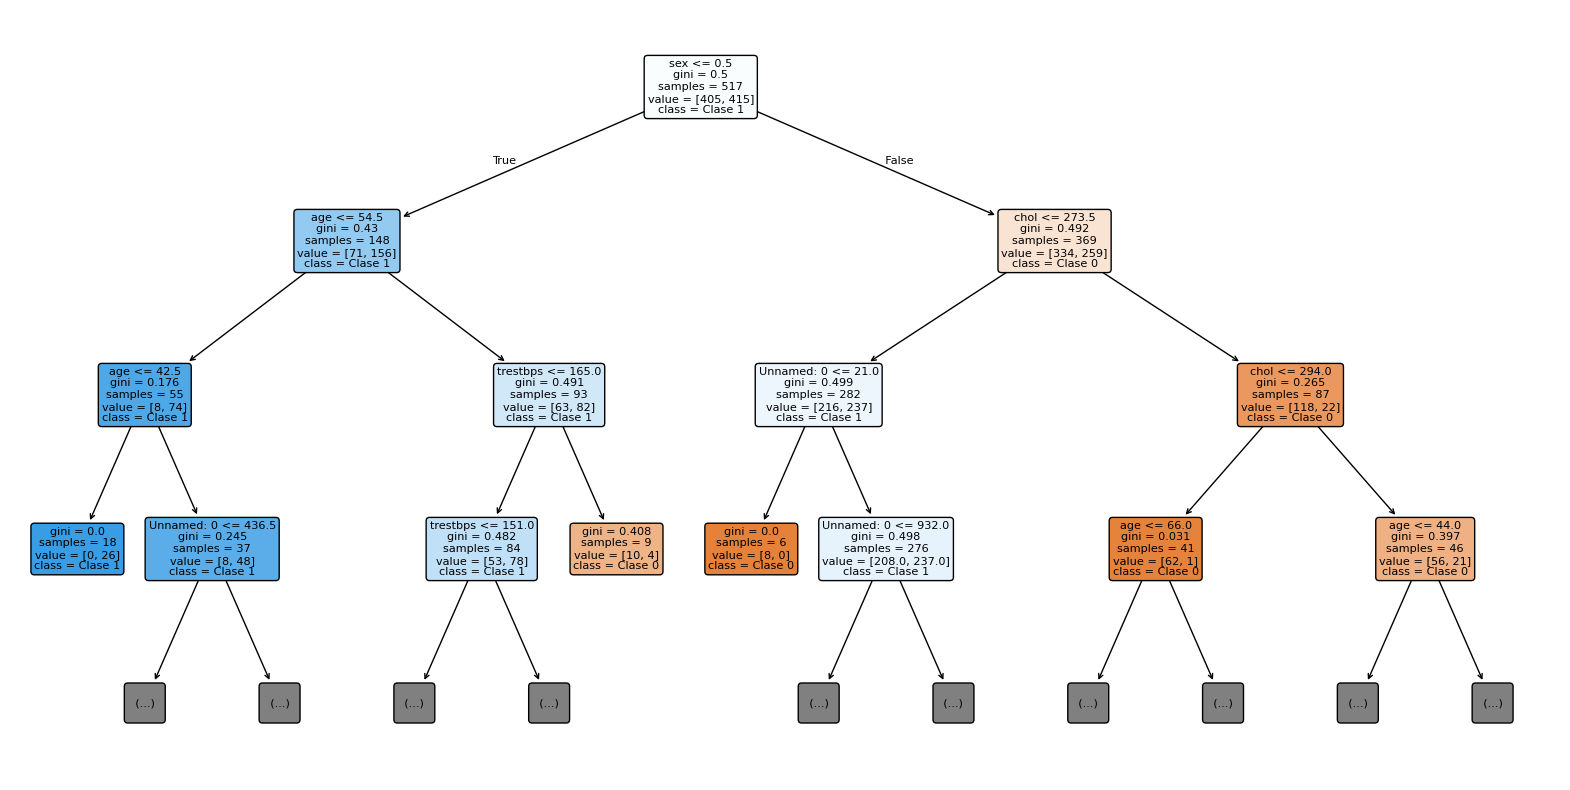

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Seleccionamos uno de los árboles del bosque (por ejemplo, el primero)
tree = best_model.estimators_[0]

# Visualización del árbol
plt.figure(figsize=(20, 10))  # tamaño grande para que se lea bien

plot_tree(
    tree,
    feature_names=X_train.columns,  # nombres de las variables
    class_names=["Clase 0", "Clase 1"],  # nombres de las clases
    filled=True,                     # colorea los nodos
    rounded=True,                    # bordes redondeados
    max_depth=3                      # limita la profundidad para interpretarlo mejor
)

plt.show()


<div style="background-color:green;color:white">

<br>

**Explica:**

* Qué variable aparece primero

  La variable: sex

* Qué significa una condición tipo *chol <= 240*

  Divide los pacientes por su nivel de colesterol


* Por qué **no debemos mostrar este árbol a un médico como modelo final**

  Porque ese árbol no representa al modelo real.
  El Random Forest decide usando muchos árboles, no uno solo.
<br>

---

### 5.2 Importancia de variables

En este apartado se va a analizar **qué variables son más importantes para el modelo Random Forest** a la hora de realizar sus predicciones.

Un Random Forest toma decisiones combinando muchos árboles de decisión. En cada árbol, las variables no se usan todas por igual: algunas aparecen con más frecuencia y generan **mejores divisiones** que reducen más la incertidumbre del modelo.
A partir de esta información, el modelo puede estimar la **importancia relativa de cada variable**.

---


#### Pistas para la implementación

* Los modelos `RandomForestClassifier` calculan automáticamente la importancia de las variables tras el entrenamiento.
* Esta información se encuentra en un **atributo del modelo**.
* Para interpretarla correctamente:

  * es conveniente asociar cada valor con el nombre de su variable,
  * y ordenar los resultados para facilitar el análisis.

📌 **Ayuda**
Consulta la documentación de `RandomForestClassifier` para identificar el atributo que almacena la importancia de las variables y su significado.


In [ ]:
# Importancia de variables del mejor modelo
importances = best_model.feature_importances_

# Asociar cada importancia con su variable
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'variable': feature_names,
    'importancia': importances
}).sort_values('importancia', ascending=False)


print(importance_df)


     variable  importancia
4        chol     0.284256
1         age     0.278764
3    trestbps     0.186884
0  Unnamed: 0     0.127677
2         sex     0.122419


<div style="background-color:green;color:white">

<br>

- ¿Coincide con lo que esperarías médicamente?

  Si

- ¿Qué variable eliminarías si quisieras simplificar aún más?

  Unamed: 0 ya que no aporta información

<br>

--

## Parte 6 – Comparación crítica de datasets

Entrena **el mismo modelo** con:

* dataset completo
* dataset de 4 variables


---

In [ ]:
X_B=df_heart.drop('target',axis=1)
y_B=df_heart['target']

X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "max_depth": [2, 3, 5, 10, 20],
    "min_samples_leaf": [5, 10, 20, 50, 100],
    "n_estimators": [10, 30, 50, 100]
}


rfc = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

# Configuración de GridSearchCV
grid2 = GridSearchCV(
    estimator=rfc,            # modelo base
    param_grid=param_grid,   # rejilla de hiperparámetros
    cv=5,                    # validación cruzada con 5 particiones
    scoring='recall',        # métrica adecuada para contexto médico
    n_jobs=-1,               # usa todos los núcleos disponibles
    verbose=3                # muestra información detallada del proceso
)

# Entrenamiento del GridSearch
grid2.fit(X_train_B, y_train_B)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid2.best_params_)

# Mejor modelo entrenado (this was the original source of the error, best_model2 should be assigned from grid2)
best_model2 = grid2.best_estimator_
print("\nMejor modelo:", best_model2)

# Evaluación sobre el conjunto de test
y_pred_B = best_model2.predict(X_test_B) # Corrected line: use best_model2 for X_test_B

print("Accuracy:", accuracy_score(y_test_B, y_pred_B))
print("Recall:", recall_score(y_test_B, y_pred_B))
print("F1-score:", f1_score(y_test_B, y_pred_B))
print("Matriz de confusión:\n", confusion_matrix(y_test_B, y_pred_B))
print("\nClassification Report:\n", classification_report(y_test_B, y_pred_B))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}

Mejor modelo: RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)
Accuracy: 0.9121951219512195
Recall: 0.9320388349514563
F1-score: 0.9142857142857143
Matriz de confusión:
 [[91 11]
 [ 7 96]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       102
           1       0.90      0.93      0.91       103

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



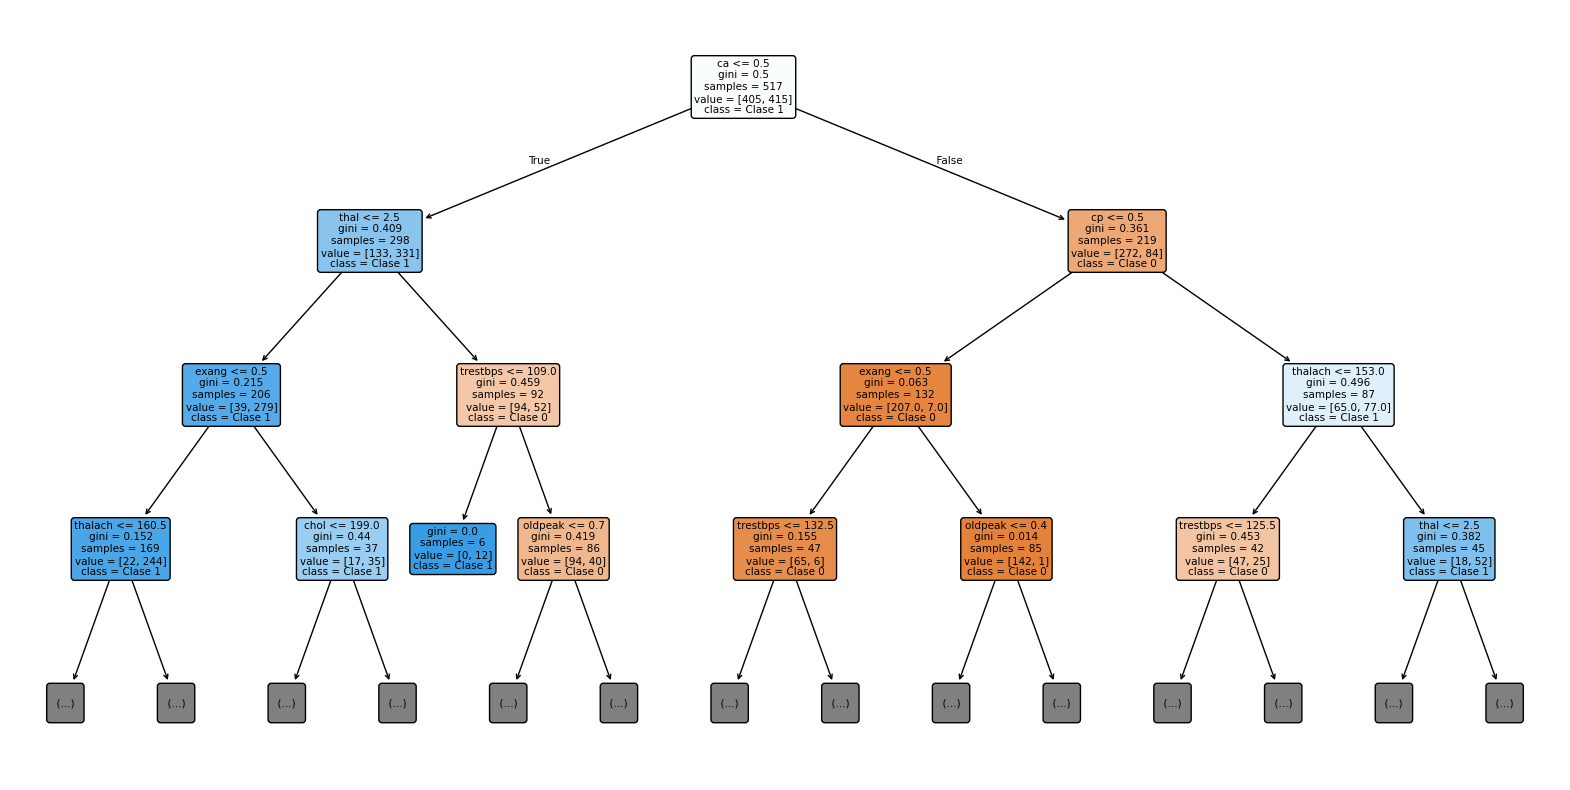

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Seleccionamos uno de los árboles del bosque (por ejemplo, el primero)
tree2 = best_model2.estimators_[0]

# Visualización del árbol
plt.figure(figsize=(20, 10))  # tamaño grande para que se lea bien

plot_tree(
    tree2,
    feature_names=X_train_B.columns,  # nombres de las variables
    class_names=["Clase 0", "Clase 1"],  # nombres de las clases
    filled=True,                     # colorea los nodos
    rounded=True,                    # bordes redondeados
    max_depth=3                      # limita la profundidad para interpretarlo mejor
)

plt.show()


In [ ]:
# Comprobar rendimiento
print("Train accuracy (Reducido):", best_model.score(X_train, y_train))
print("Test accuracy (Reducido):", best_model.score(X_test, y_test))
print("Train accuracy (Completo):", best_model2.score(X_train_B, y_train_B))
print("Test accuracy (Completo):", best_model2.score(X_test_B, y_test_B))


Train accuracy (Reducido): 0.95
Test accuracy (Reducido): 0.7804878048780488
Train accuracy (Completo): 0.9804878048780488
Test accuracy (Completo): 0.9121951219512195


<div style="background-color:green;color:white">

<br>

Completa una tabla como esta:

| Dataset   | Accuracy | Interpretabilidad | Riesgo de overfitting |
|-----------|----------|-------------------|------------------------|
| Reducido  | 0,78     | Buena             | Alto (dif=0.17)    |
| Completo  | 0,91     | Mala              | Bajo (dif=0.07)        |


<br>



<div style="background-color:green;color:white">

<br>

¿Qué modelo recomendarías *en un hospital pequeño* y por qué?

Recomendaria el modelo reducido ya que es mas facil de interpretar y se adaptaria mejor.


<br>

---

## Parte 7 – Reflexión final

Responde brevemente (5–6 líneas cada una):

<div style="background-color:green;color:white">

<br>

1. ¿Por qué Random Forest es una buena elección aquí?

  Porque da muy buena precisión, funciona bien con datos pequeños o medianos, aguanta bastante bien el sobreajuste y sigue siendo razonablemente interpretable.

2. ¿Cuándo **no** usarías Random Forest?

  Cuando necesitas explicaciones muy claras y fáciles de justificar, cuando el volumen de datos es enorme y el coste computacional se dispara, o cuando buscas predicciones casi instantáneas con muy poca latencia.

3. ¿Qué mejorarías si tuvieras más datos?

  Podrías usar modelos más potentes, mejorar la capacidad de generalización, reducir el ruido y obtener estimaciones más fiables sobre qué variables pesan más.

<br>
